# Project 3, Part 2
- Martisha Owens
- 11/17/2022

## Specifications - Financial Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import os, time, json
import tmdbsimple as tmdb 
from tqdm.notebook import tqdm_notebook

In [41]:
with open('/Users/martishaowens/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
login.keys()
tmdb.API_KEY =  login['api-key']

### Define Functions

In [3]:
def get_movie_with_rating(movie_id):
    movie = tmdb.Movies(movie_id)
    
    info = movie.info()
    
    releases = movie.releases()
    
    for c in releases['countries']:
        if c['iso_3166_1' ] =='US':
            info['certification'] = c['certification']
    return info

In [4]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). """
    
    with open(filename,'r+') as file:
        file_data = json.load(file)
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        file.seek(0)
        json.dump(file_data, file)

### Confirm API Function work

In [57]:
test_ids = ["tt0848228","tt0332280"]
results = []
errors2 = []
for movie_id in test_ids:
    
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)
        
    except Exception as e: 
        errors2.append([movie_id, e])
    
pd.DataFrame(results)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.707,27770,PG-13
1,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.879,9924,PG-13


### Start Loop

In [42]:
basics = pd.read_csv('data/title_basics.csv.gz')
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,126,Drama


In [13]:
YEARS_TO_GET = [2000,2001]

In [43]:
errors = [ ]

In [46]:
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    file_exists = os.path.isfile(JSON_FILE)
    
    if file_exists == False:
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)
    df = basics.loc[ basics['startYear']==YEAR].copy()
    movie_ids = df['tconst'].copy()     
    
    previous_df = pd.read_json(JSON_FILE)
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
    
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
        try:
            temp = get_movie_with_rating(movie_id)  
            write_json(temp,JSON_FILE)
            time.sleep(0.02)
            
        except Exception as e:
            errors.append([movie_id, e])
            
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

print(f"- Total errors: {len(errors)}")

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000:   0%|          | 0/1415 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/1532 [00:00<?, ?it/s]

- Total errors: 466


## Exploratory Data Analysis

In [2]:
tmdb2000 = pd.read_csv('data/final_tmdb_data_2000.csv.gz')
tmdb2001 = pd.read_csv('data/final_tmdb_data_2001.csv.gz')

In [6]:
df = pd.concat([tmdb2000, tmdb2001], ignore_index=True)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.104,2027.0,PG


### How many movies had at least some valid financial information (values > 0 for budget OR revenue)



In [10]:
df[(df['budget']>0)|(df['revenue']>0)].shape[0]

625

In [73]:
df['valid'] = (df['budget']>0)|(df['revenue']>0)
df.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,valid
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN,True
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN,False


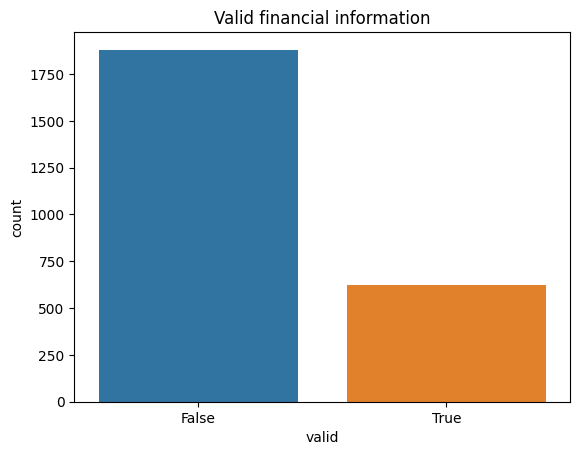

In [74]:
sns.countplot(data=df, x= 'valid')
plt.title('Valid financial information');

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [12]:
dfc = df[(df['budget']>0)|(df['revenue']>0)]

In [13]:
dfc['certification'].value_counts()

R        228
PG-13    130
PG        36
NR        17
G         14
Name: certification, dtype: int64

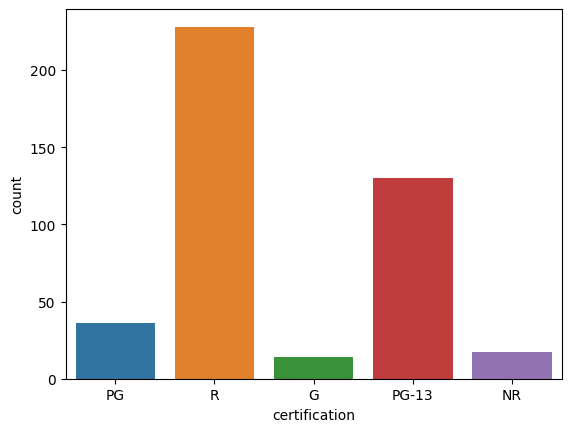

In [16]:
sns.countplot(data=dfc, x='certification');

### What is the average revenue per certification category?

In [30]:
mean = dfc.groupby('certification')['revenue'].mean()

In [55]:
mean

certification
G        1.237463e+08
NR       8.887619e+06
PG       1.092184e+08
PG-13    1.000266e+08
R        3.335293e+07
Name: revenue, dtype: float64

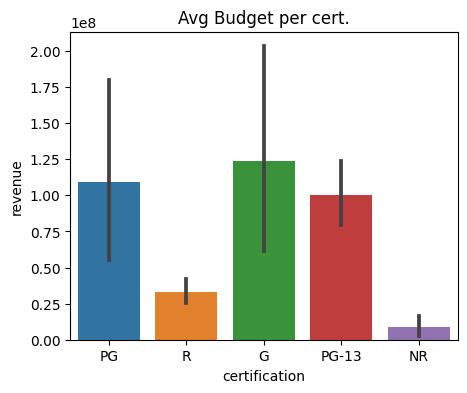

In [78]:
fig, ax = plt.subplots(ncols=1, figsize=(5,4))
ax = sns.barplot(data = dfc, x = 'certification', y = 'revenue')
ax.set_title('Avg Budget per cert.');

### What is the average budget per certification category?

In [61]:
mean = dfc.groupby('certification')['budget'].mean()
mean

certification
G        4.085714e+07
NR       6.300006e+06
PG       4.372917e+07
PG-13    4.348391e+07
R        1.982239e+07
Name: budget, dtype: float64

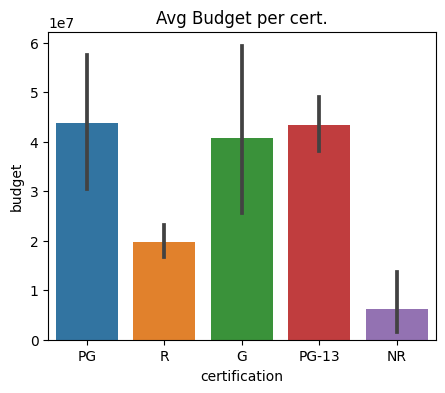

In [77]:
fig, ax = plt.subplots(ncols=1, figsize=(5,4))
ax = sns.barplot(data = dfc, x = 'certification', y = 'budget')
#ax.set_ylabel('mean')
ax.set_title('Avg Budget per cert.');

## Deliverables

In [105]:
dfc.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)